In [2]:
%pylab inline
import pandas as pd

from dataManager import DataManager
from model import ModelManager as manager

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import plotly.graph_objects as go

Populating the interactive namespace from numpy and matplotlib


In [166]:
a=DataManager().sales_prod

In [169]:
a[a['PROD_REF']=='XZ0993:00100:']


,ID,NRO_DOCUMENTO,FECHA,CODIGO_TIENDA,TIENDA,PROD_REF,CANTIDAD,PRECIO,SUBTOTAL,DESCUENTO(%),...,PUESTOS,COLOR,ANCHO,ALTO,FONDO,DESC_LARGA,SUBCATEGORIA_POS,COLOR_POS,MATERIAL_POS,AREA
20771,11:FSV-00001893:XZ0993:00100:,FSV-00001893,2020-03-09,11,ADMINISTRACION,XZ0993:00100:,1,546677.0,546677,0.700000,...,0.0,BLANCO,100.0,44.0,50.0,MESA CENTRO FILIS LACA BL 2C LIQUIDACIÓN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0
20772,11:FSV-00002298:XZ0993:00100:,FSV-00002298,2021-02-25,11,ADMINISTRACION,XZ0993:00100:,1,546677.0,546677,0.800001,...,0.0,BLANCO,100.0,44.0,50.0,MESA CENTRO FILIS LACA BL 2C LIQUIDACIÓN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0
20773,11:FSV-00002360:XZ0993:00100:,FSV-00002360,2021-04-15,11,ADMINISTRACION,XZ0993:00100:,1,593462.0,593462,0.493755,...,0.0,BLANCO,100.0,44.0,50.0,MESA CENTRO FILIS LACA BL 2C LIQUIDACIÓN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0
20774,100:FVP-00024639:XZ0993:00100:,FVP-00024639,2019-11-30,100,PUNTO DE VENTA AV 68,XZ0993:00100:,1,546677.0,546677,0.500001,...,0.0,BLANCO,100.0,44.0,50.0,MESA CENTRO FILIS LACA BL 2C LIQUIDACIÓN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0
20775,100:FVP-00026652:XZ0993:00100:,FVP-00026652,2020-02-24,100,PUNTO DE VENTA AV 68,XZ0993:00100:,1,546677.0,546677,0.700000,...,0.0,BLANCO,100.0,44.0,50.0,MESA CENTRO FILIS LACA BL 2C LIQUIDACIÓN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0
20776,100:FVP-00026845:XZ0993:00100:,FVP-00026845,2020-03-02,100,PUNTO DE VENTA AV 68,XZ0993:00100:,1,546677.0,546677,0.700000,...,0.0,BLANCO,100.0,44.0,50.0,MESA CENTRO FILIS LACA BL 2C LIQUIDACIÓN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0
20777,100:FVP-00031467:XZ0993:00100:,FVP-00031467,2021-02-12,100,PUNTO DE VENTA AV 68,XZ0993:00100:,1,546678.0,546678,0.600000,...,0.0,BLANCO,100.0,44.0,50.0,MESA CENTRO FILIS LACA BL 2C LIQUIDACIÓN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0
20778,100:FVP-00032203:XZ0993:00100:,FVP-00032203,2021-03-30,100,PUNTO DE VENTA AV 68,XZ0993:00100:,1,546678.0,546678,0.600000,...,0.0,BLANCO,100.0,44.0,50.0,MESA CENTRO FILIS LACA BL 2C LIQUIDACIÓN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0
20779,100:FVP-00032262:XZ0993:00100:,FVP-00032262,2021-04-05,100,PUNTO DE VENTA AV 68,XZ0993:00100:,1,546678.0,546678,0.619999,...,0.0,BLANCO,100.0,44.0,50.0,MESA CENTRO FILIS LACA BL 2C LIQUIDACIÓN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0
20780,102:FVP-00009240:XZ0993:00100:,FVP-00009240,2020-02-17,102,PUNTO DE VENTA CENTRO MAYOR,XZ0993:00100:,1,546677.0,546677,0.700000,...,0.0,BLANCO,100.0,44.0,50.0,MESA CENTRO FILIS LACA BL 2C LIQUIDACIÓN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0


In [133]:
prods = data = DataManager().products.drop_duplicates().copy()
prods['AREA'] = prods.ANCHO * prods.FONDO

data = DataManager().sales_ref_month_sin_ventas_mayores()
data['DATE'] = data['ANIO'].astype(str) + '-' + data['MES'].astype(str).str.zfill(2)

df = data.pivot_table(index='REF',columns=['DATE','ANIO','MES','TIENDA'],values='CANTIDAD',aggfunc='sum').reset_index()
df = pd.melt(df,id_vars='REF')

df = df.sort_values(['REF','DATE'])
df = df.rename(columns={'value':'CANTIDAD'})
df = df.reset_index(drop=True).fillna(0)

df = df.merge(data.drop(columns=['ANIO','MES','CANTIDAD']).groupby(['REF','DATE','TIENDA']).mean(),on=['REF','DATE','TIENDA'],how='left',validate='1:1')
df = df[['REF','TIENDA','DATE','ANIO','MES','CANTIDAD','PRECIO','DESCUENTO(%)','F_COVID']]
display(df.info())
df = df.fillna(0)

df = df.merge(prods,on='REF',validate='m:1')
df = df.sort_values(['ANIO','MES']).reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382165 entries, 0 to 382164
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   REF           382165 non-null  object 
 1   TIENDA        382165 non-null  object 
 2   DATE          382165 non-null  object 
 3   ANIO          382165 non-null  int64  
 4   MES           382165 non-null  int64  
 5   CANTIDAD      382165 non-null  float64
 6   PRECIO        20341 non-null   float64
 7   DESCUENTO(%)  20341 non-null   float64
 8   F_COVID       20341 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 29.2+ MB


None

In [134]:
df.PUESTOS.fillna(0,inplace=True)

In [135]:
aux=DataManager().sales_accounting_stores().groupby(['REF','TIENDA']).agg({'PRECIO':'mean','DESCUENTO(%)':'mean','AREA':'first',
                                            'ALTO':'first','PUESTOS':'first', 'COLOR_POS':'first', 
                                            'SUBCATEGORIA_POS':'first','MATERIAL_POS':'first','ACABADO':'first',
                                            'CATEGORIA':'first','ORIGEN':'first'}).reset_index()
# 2021 future months and covid
months=[5,6,7,8,9,10,11,12]
covid=[1,1,1,1,1,1,1,1]
#aux0=pd.pivot_table(data=aux,index=['REF','TIENDA'],values='F_COVID',columns='MES',fill_value=1)
aux0=aux[['REF','TIENDA']].copy()
for m,c in zip(months,covid):
    aux0[m]=c
display(aux0)
aux1=pd.melt(aux0,id_vars=['REF','TIENDA'],var_name='MES',value_name='F_COVID')
display(aux1.sort_values(by=['REF','TIENDA']))
final_df_future=aux1.merge(aux,on=['REF','TIENDA'],how='left')
final_df_future['ANIO']=2021
final_df_future['DATE'] = final_df_future['ANIO'].astype(str) + '-' +final_df_future['MES'].astype(str).str.zfill(2)
final_df_future

,REF,TIENDA,5,6,7,8,9,10,11,12
0,A01040:00005:,ADMINISTRACION,1,1,1,1,1,1,1,1
1,A01040:00005:,PAGINA WEB FIOTTI,1,1,1,1,1,1,1,1
2,A01040:00005:,PUNTO DE VENTA AV 68,1,1,1,1,1,1,1,1
3,A01040:00005:,PUNTO DE VENTA BUCARAMANGA,1,1,1,1,1,1,1,1
4,A01040:00005:,PUNTO DE VENTA CALI,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
17537,XZ0993:00100:,PUNTO DE VENTA PLAZA IMPERIAL,1,1,1,1,1,1,1,1
17538,XZ0993:00100:,PUNTO DE VENTA POBLADO,1,1,1,1,1,1,1,1
17539,XZ0993:00100:,PUNTO DE VENTA SOACHA,1,1,1,1,1,1,1,1
17540,XZ0993:00100:,VENTAS DIGITALES,1,1,1,1,1,1,1,1


,REF,TIENDA,MES,F_COVID
0,A01040:00005:,ADMINISTRACION,5,1
17542,A01040:00005:,ADMINISTRACION,6,1
35084,A01040:00005:,ADMINISTRACION,7,1
52626,A01040:00005:,ADMINISTRACION,8,1
70168,A01040:00005:,ADMINISTRACION,9,1
...,...,...,...,...
70167,XZ0993:00100:,VILLA DEL RIO,8,1
87709,XZ0993:00100:,VILLA DEL RIO,9,1
105251,XZ0993:00100:,VILLA DEL RIO,10,1
122793,XZ0993:00100:,VILLA DEL RIO,11,1


,REF,TIENDA,MES,F_COVID,PRECIO,DESCUENTO(%),AREA,ALTO,PUESTOS,COLOR_POS,SUBCATEGORIA_POS,MATERIAL_POS,ACABADO,CATEGORIA,ORIGEN,ANIO,DATE
0,A01040:00005:,ADMINISTRACION,5,1,0.000000,0.000000,1880.0,77.0,1.0,NEGRO,SILLAS DE COMEDOR,SINTÉTICO,SUPERFICIES MATES,COMEDORES,IMPORTADO,2021,2021-05
1,A01040:00005:,PAGINA WEB FIOTTI,5,1,0.000000,0.000000,1880.0,77.0,1.0,NEGRO,SILLAS DE COMEDOR,SINTÉTICO,SUPERFICIES MATES,COMEDORES,IMPORTADO,2021,2021-05
2,A01040:00005:,PUNTO DE VENTA AV 68,5,1,5186.079365,0.023214,1880.0,77.0,1.0,NEGRO,SILLAS DE COMEDOR,SINTÉTICO,SUPERFICIES MATES,COMEDORES,IMPORTADO,2021,2021-05
3,A01040:00005:,PUNTO DE VENTA BUCARAMANGA,5,1,0.000000,0.000000,1880.0,77.0,1.0,NEGRO,SILLAS DE COMEDOR,SINTÉTICO,SUPERFICIES MATES,COMEDORES,IMPORTADO,2021,2021-05
4,A01040:00005:,PUNTO DE VENTA CALI,5,1,0.000000,0.000000,1880.0,77.0,1.0,NEGRO,SILLAS DE COMEDOR,SINTÉTICO,SUPERFICIES MATES,COMEDORES,IMPORTADO,2021,2021-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140331,XZ0993:00100:,PUNTO DE VENTA PLAZA IMPERIAL,12,1,19524.178571,0.017857,5000.0,44.0,0.0,BLANCO,MESAS DE CENTRO,VIDRIO,BRILLANTE,SALAS Y SOFAS,IMPORTADO,2021,2021-12
140332,XZ0993:00100:,PUNTO DE VENTA POBLADO,12,1,21026.038462,0.030769,5000.0,44.0,0.0,BLANCO,MESAS DE CENTRO,VIDRIO,BRILLANTE,SALAS Y SOFAS,IMPORTADO,2021,2021-12
140333,XZ0993:00100:,PUNTO DE VENTA SOACHA,12,1,32157.470588,0.041176,5000.0,44.0,0.0,BLANCO,MESAS DE CENTRO,VIDRIO,BRILLANTE,SALAS Y SOFAS,IMPORTADO,2021,2021-12
140334,XZ0993:00100:,VENTAS DIGITALES,12,1,0.000000,0.000000,5000.0,44.0,0.0,BLANCO,MESAS DE CENTRO,VIDRIO,BRILLANTE,SALAS Y SOFAS,IMPORTADO,2021,2021-12


In [148]:
num_var=['PRECIO','AREA','ALTO','DESCUENTO(%)','CANTIDAD']
x_num=df[num_var[:-1]].astype('float')

cat_var=[
    'MES','TIENDA', 'PUESTOS', 'COLOR_POS', 'SUBCATEGORIA_POS', 'F_COVID' ,'MATERIAL_POS','ACABADO','CATEGORIA','ORIGEN'#quitamos anio, vigencia y estilo-validado errro casi no cambia
]
x_cat=df[cat_var].astype('category')
x_cat_dummies=pd.get_dummies(x_cat)

y = df['CANTIDAD']

scaler = MinMaxScaler()
x_num_norm = scaler.fit_transform(x_num)
x = np.append(x_num_norm,x_cat_dummies,axis=1)

#split data till januar 2021

index = df[(df.ANIO==2021)].index[0]
date_index=df[(df.ANIO==2021)]['DATE'].values[0]
date_indebef=df.loc[index-1]['DATE']
date_indeaf=df.loc[index+1]['DATE']

x_train = x[:index]
y_train = y[:index]
x_test = x[index:]
y_test = y[index:]

In [149]:
x_train.shape

(325780, 88)

In [155]:
df.shape

(382165, 28)

In [157]:
#incorporate data future
num_var=['PRECIO','AREA','ALTO','DESCUENTO(%)','CANTIDAD']

data_future=final_df_future

df_concat=pd.concat([df.drop('CANTIDAD',axis=1),data_future]).reset_index(drop=True)
max_index=df.tail(1).index[0]

x_num=df_concat[num_var[:-1]].astype('float')

cat_var=[
'MES',
'TIENDA', 
'PUESTOS', 'COLOR_POS', 'SUBCATEGORIA_POS', 'F_COVID' ,'MATERIAL_POS','ACABADO','CATEGORIA','ORIGEN'
#quitamos anio, vigencia y estilo. validado: error casi no cambia y en el eda se demuestra
]
x_cat=df_concat[cat_var].astype('category')
x_cat_dummies=pd.get_dummies(x_cat)

y = df['CANTIDAD']

scaler = MinMaxScaler()
x_num_norm = scaler.fit_transform(x_num)
x = np.append(x_num_norm,x_cat_dummies,axis=1)

#split data till januar 2021 and future
index = df[(df.ANIO==2021)].index[0]
max_index=df.tail(1).index[0]# from data, future begins here

date_index=df[(df.ANIO==2021)]['DATE'].values[0]
date_before=df.loc[index-1]['DATE']
date_after=df.loc[index+1]['DATE']
last_date_known=df.tail(1)['DATE'] #future begins here


x_train = x[:index]
y_train = y[:index]
x_test = x[index:max_index+1]
y_test = y[index:max_index+1]
x_future=x[max_index+1:]
#no y from future....

In [158]:
x_train.shape

(325780, 88)

In [128]:
y[index:max_index].shapeb

(2730,)

In [129]:
np.nan

nan

In [161]:
df_concat[max_index+1:]

,REF,TIENDA,DATE,ANIO,MES,PRECIO,DESCUENTO(%),F_COVID,ITEM,DESCRIPCION,...,PUESTOS,COLOR,ANCHO,ALTO,FONDO,DESC_LARGA,SUBCATEGORIA_POS,COLOR_POS,MATERIAL_POS,AREA
382165,A01040:00005:,ADMINISTRACION,2021-05,2021,5,0.000000,0.000000,1.0,NaN,NaN,...,1.0,NaN,NaN,77.0,NaN,NaN,SILLAS DE COMEDOR,NEGRO,SINTÉTICO,1880.0
382166,A01040:00005:,PAGINA WEB FIOTTI,2021-05,2021,5,0.000000,0.000000,1.0,NaN,NaN,...,1.0,NaN,NaN,77.0,NaN,NaN,SILLAS DE COMEDOR,NEGRO,SINTÉTICO,1880.0
382167,A01040:00005:,PUNTO DE VENTA AV 68,2021-05,2021,5,5186.079365,0.023214,1.0,NaN,NaN,...,1.0,NaN,NaN,77.0,NaN,NaN,SILLAS DE COMEDOR,NEGRO,SINTÉTICO,1880.0
382168,A01040:00005:,PUNTO DE VENTA BUCARAMANGA,2021-05,2021,5,0.000000,0.000000,1.0,NaN,NaN,...,1.0,NaN,NaN,77.0,NaN,NaN,SILLAS DE COMEDOR,NEGRO,SINTÉTICO,1880.0
382169,A01040:00005:,PUNTO DE VENTA CALI,2021-05,2021,5,0.000000,0.000000,1.0,NaN,NaN,...,1.0,NaN,NaN,77.0,NaN,NaN,SILLAS DE COMEDOR,NEGRO,SINTÉTICO,1880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522496,XZ0993:00100:,PUNTO DE VENTA PLAZA IMPERIAL,2021-12,2021,12,19524.178571,0.017857,1.0,NaN,NaN,...,0.0,NaN,NaN,44.0,NaN,NaN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0
522497,XZ0993:00100:,PUNTO DE VENTA POBLADO,2021-12,2021,12,21026.038462,0.030769,1.0,NaN,NaN,...,0.0,NaN,NaN,44.0,NaN,NaN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0
522498,XZ0993:00100:,PUNTO DE VENTA SOACHA,2021-12,2021,12,32157.470588,0.041176,1.0,NaN,NaN,...,0.0,NaN,NaN,44.0,NaN,NaN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0
522499,XZ0993:00100:,VENTAS DIGITALES,2021-12,2021,12,0.000000,0.000000,1.0,NaN,NaN,...,0.0,NaN,NaN,44.0,NaN,NaN,MESAS DE CENTRO,BLANCO,VIDRIO,5000.0


In [84]:
len(df_concat.iloc[:index])

17610

In [159]:
%%time
model = GradientBoostingRegressor(**{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200})
model.fit(x_train,y_train)

Wall time: 5min 28s


GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200)

In [ ]:
list(zip(x_num.columns.append(x_cat_dummies.columns),model.feature_importances_))

[('PRECIO', 0.7131566873768391),
 ('AREA', 0.00017771921479726085),
 ('ALTO', 0.002995079867702089),
 ('DESCUENTO(%)', 0.10340316503200166),
 ('MES_1', 0.0),
 ('MES_2', 0.0),
 ('MES_3', 0.0),
 ('MES_4', 6.383708842572016e-05),
 ('MES_5', 0.0),
 ('MES_6', 9.715629529746664e-05),
 ('MES_7', 0.0),
 ('MES_8', 0.00010232720194786048),
 ('MES_9', 0.0),
 ('MES_10', 9.312023090214922e-05),
 ('MES_11', 0.0004398910052304852),
 ('MES_12', 0.0),
 ('TIENDA_ADMINISTRACION', 0.0),
 ('TIENDA_PAGINA WEB FIOTTI', 0.0009845301002492804),
 ('TIENDA_PUNTO DE VENTA AV 68', 0.016982014737535862),
 ('TIENDA_PUNTO DE VENTA BUCARAMANGA', 0.0),
 ('TIENDA_PUNTO DE VENTA CALI', 5.115495074385719e-06),
 ('TIENDA_PUNTO DE VENTA CALLE 134', 0.0002094220749586712),
 ('TIENDA_PUNTO DE VENTA CENTRO MAYOR', 0.003950830730045819),
 ('TIENDA_PUNTO DE VENTA LAURELES', 0.0),
 ('TIENDA_PUNTO DE VENTA PLAZA CENTRAL', 0.0),
 ('TIENDA_PUNTO DE VENTA PLAZA IMPERIAL', 0.0),
 ('TIENDA_PUNTO DE VENTA POBLADO', 0.0001403411737616038

In [131]:
mse(model.predict(x_test),y_test)

3.03795497927721

In [132]:
mse(model.predict(x_train),y_train)

3.391056458689399

In [10]:
import joblib
joblib.dump(model,'assets/model/model.pkl')

['assets/model/model.pkl']

In [10]:
%%time
param_dist = {'n_estimators':[30, 40, 100, 200, 300],'learning_rate':[0.01, 0.05, 0.1, 0.3, 0.4, 1], 'max_depth': [2,4,6,8,10]}

grid_br = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions = param_dist,cv=3,n_jobs=4,scoring='neg_mean_squared_error',n_iter=50)
grid_br.fit(x_train, y_train)


In [ ]:
grid_br.best_params_

In [ ]:
mse(gird_br.predict(x_test),y_test)

In [60]:
df['PREDICTED'] = model.predict(np.concatenate([x_train,x_test,x_future],axis=0)).round()
df_train=df[:index]
df_test=df[index:]
res = df.groupby(['REF','DATE']).sum().reset_index()
res_train=df_train.groupby(['REF','DATE']).sum().reset_index()
res_test=df_test.groupby(['REF','DATE']).sum().reset_index()

In [61]:
mse(df_train.PREDICTED,df_train.CANTIDAD) #crece por el round

0.2164988642642274

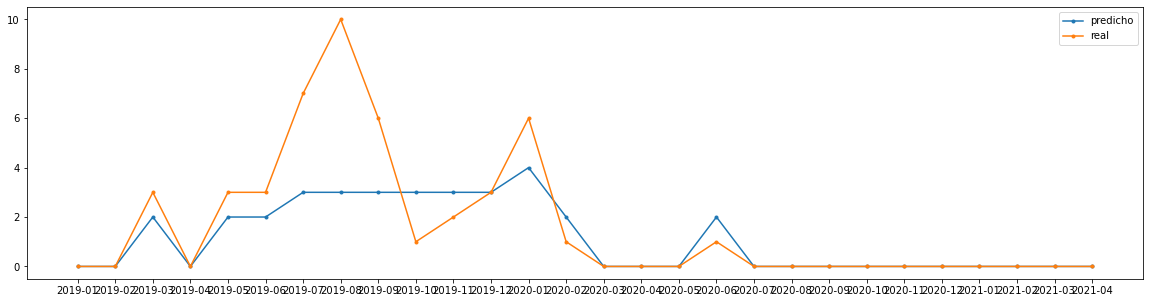

In [62]:
def plot_by_ref_tienda(ref,tienda):
    aux=df.query('REF==@ref & TIENDA==@tienda')
    plt.figure(figsize=(20,5))
    plt.plot(aux['DATE'],aux['PREDICTED'],label='predicho',marker='.')
    plt.plot(aux['DATE'],aux['CANTIDAD'],label='real',marker='.')
    plt.legend()
plot_by_ref_tienda('XA0539:00061:','PUNTO DE VENTA AV 68')


In [34]:
mse(res_test['PREDICTED'],res_test['CANTIDAD'])

2.3106544293695133

In [25]:
l='-'.join(['d','a'])
l

'd-a'

In [35]:
aux = res.query('REF=="XA0539:00061:"')
fig = go.Figure()
fig.add_scatter(x=aux['DATE'], y=aux['PREDICTED'], mode='lines+markers', name='Valores predichos')
fig.add_scatter(x=aux['DATE'], y=aux['CANTIDAD'], mode='lines+markers', name='Valores reales')
fig.add_vline(x=date_index, line_width=3, line_dash="dot", line_color="green"
                ,y0=-2,y1=max([aux['PREDICTED'].max(),aux['CANTIDAD'].max()])+1)
fig.add_annotation(x='-'.join([date_indeaf,'5']), y=max([aux['PREDICTED'].max(),aux['CANTIDAD'].max()]),
            text="Test",
            font=dict(
            family="Courier New, monospace",
            size=16,
            color="black"
            ),
            showarrow=True,
            arrowhead=1,
            ax=35,
            ay=0,
            xanchor="center",
            yanchor="middle",)
fig.add_annotation(x='-'.join([date_indebef,'25']), y=max([aux['PREDICTED'].max(),aux['CANTIDAD'].max()]),
            text="Train",
            font=dict(
            family="Courier New, monospace",
            size=16,
            color="black"
            ),
            showarrow=True,
            arrowhead=1,
            ax=-40,
            ay=0,
            xanchor="center",
            yanchor="middle",)

fig.add_annotation(x='-'.join([date_indeaf,'31']), y=max([aux['PREDICTED'].max(),aux['CANTIDAD'].max()])/2,
            text="RMSE:<br>{:.2f}".format(mse(res_test.PREDICTED,res_test.CANTIDAD,squared=False)),
            font=dict(
            family="Courier New, monospace",
            size=16,
            color="black"
            ),
            showarrow=False,
            ax=35,
            ay=0,
            )
fig.add_annotation(x='-'.join([date_indebef,'1']), y=max([aux['PREDICTED'].max(),aux['CANTIDAD'].max()])/2,
            text="RMSE:<br>{:.2f}".format(mse(res_train.PREDICTED,res_train.CANTIDAD,squared=False)),
            font=dict(
            family="Courier New, monospace",
            size=16,
            color="black"
            ),
            showarrow=False,
            arrowhead=1,
            ax=-40,
            ay=0,
            xanchor="center",)
fig.update_layout(
    title="Ventas por referencia",
    yaxis_title="Número de ventas",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

In [ ]:
def split_data(prevs):
    prevs.append(var)
    x_cat=data[prevs].astype('category')
    x_cat_dummies=pd.get_dummies(x_cat)

    y = data['CANTIDAD']

    scaler = MinMaxScaler()
    x_num_norm = scaler.fit_transform(x_num)
    x = np.append(x_num_norm,x_cat_dummies,axis=1)

    #split data till januar 2021
    index = data[(data.ANIO==2021)].index[0]

    x_train = x[:index-1]
    y_train = y[:index-1]
    x_test = x[index-1:]
    y_test = y[index-1:]
    
    return x_train,y_train,x_test,y_test,prevs
    
def fit_model(x_train,y_train):
    model = GradientBoostingRegressor(**{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300})
    model.fit(x_train,y_train)
    
    return model
    
def get_mse(model,x_test,y_test):
    return mse(model.predict(x_test),y_test)

In [ ]:
data = DataManager().sales_ref_month_sin_ventas_mayores()

num_var=['AREA','ALTO','DESCUENTO(%)','PRECIO','CANTIDAD']
x_num=data[num_var[:-1]].astype('float')

cat_var=[
    'ANIO', 'MES', 'TIENDA', 'PUESTOS', 'COLOR_POS', 'CATEGORIA', 'SUBCATEGORIA_POS', 'VIGENCIA',
    'ORIGEN', 'ESTILO', 'MATERIAL_POS', 'ACABADO', 'F_COVID', 'REF'
]

x_train,y_train,x_test,y_test,prevs = split_data(cat_var)
%time model = fit_model(x_train,y_train)
print('MSE for variables:')
print(prevs)
print(get_mse(model,x_test,y_test))
print('--------------------------------------')

In [ ]:
data = DataManager().sales_ref_month_sin_ventas_mayores()
data['DATE'] = data['ANIO'].astype(str) + '-' + data['MES'].astype(str).str.zfill(2)

num_var=['AREA','ALTO','DESCUENTO(%)','PRECIO','CANTIDAD']
x_num=data[num_var[:-1]].astype('float')

cat_var=[
    'ANIO', 'MES', 'TIENDA', 'PUESTOS', 'COLOR_POS', 'SUBCATEGORIA_POS', 'ESTILO', 'F_COVID' 
]

x_train,y_train,x_test,y_test,prevs = split_data(cat_var)
%time model = fit_model(x_train,y_train)
print('MSE for variables:')
print(prevs)
print(get_mse(model,x_test,y_test))
print('--------------------------------------')

In [ ]:
data['PREDICTED'] = model.predict(np.concatenate([x_train,x_test],axis=0)).round()
data = data.groupby(['REF','DATE']).sum().reset_index()

In [ ]:
aux = data.query('REF=="D00935:00048:00048"')
fig = go.Figure()
fig.add_scatter(x=aux['DATE'], y=aux['PREDICTED'], mode='lines', name='Valores predichos')
fig.add_scatter(x=aux['DATE'], y=aux['CANTIDAD'], mode='lines', name='Valores reales')